In [135]:
import pandas as pd
import numpy as np
from tensorflow import convert_to_tensor
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [144]:
import importlib
import matchrequest
import utils
importlib.reload(matchrequest)
importlib.reload(utils)

<module 'utils' from 'c:\\Jiri\\Code\\Python_ml_2\\ML_DOTA2_MATCH_WIN\\utils.py'>

In [2]:
train_df = pd.read_csv('train_data.csv')
train_df.drop(['game_mode'], axis=1)
train_df.head()
X= train_df.drop(['game_mode', 'radiant_win','match_id'], axis=1)


In [3]:
X.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,45,80,88,8,98,45,80,88,8,98
1,56,1,23,47,97,56,1,23,47,97
2,68,63,16,48,21,68,63,16,48,21
3,74,105,71,16,73,74,105,71,16,73
4,94,85,83,86,128,94,85,83,86,128


In [4]:
X.shape[1]

10

In [5]:
y = train_df['radiant_win']
y = [int(b) for b in y]
y = pd.DataFrame(y, columns=['radiant_win'])
y.head()

,radiant_win
0,0
1,1
2,1
3,1
4,0


In [6]:
y.describe()

,radiant_win
count,321618.000000
mean,0.647333
std,0.477801
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [8]:
X_train.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
198027,87,98,56,12,75,87,98,56,12,75
237493,12,87,104,39,56,12,87,104,39,56
109781,22,29,14,119,56,22,29,14,119,56
78820,14,26,42,76,77,14,26,42,76,77
188485,21,106,4,40,7,21,106,4,40,7


In [9]:
X_train.describe()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
count,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000
mean,58.163333,59.761074,51.394813,55.963410,57.402860,58.163333,59.761074,51.394813,55.963410,57.402860
std,38.019135,41.686649,37.758779,38.347059,37.928128,38.019135,41.686649,37.758779,38.347059,37.928128
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,20.000000,19.000000,25.000000,25.000000,21.000000,20.000000,19.000000,25.000000,25.000000
50%,59.000000,50.000000,42.000000,49.000000,51.000000,59.000000,50.000000,42.000000,49.000000,51.000000
75%,93.000000,100.000000,81.000000,88.000000,95.000000,93.000000,100.000000,81.000000,88.000000,95.000000
max,137.000000,137.000000,138.000000,138.000000,138.000000,137.000000,137.000000,138.000000,138.000000,138.000000


In [10]:
y_train.describe()

,radiant_win
count,241213.000000
mean,0.647793
std,0.477659
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [11]:
y_train.head()

,radiant_win
198027,0
237493,1
109781,1
78820,0
188485,1


### Model

In [12]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(50, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

Epoch 1/20
943/943 [==============================] - 13s 11ms/step - loss: 0.5389 - accuracy: 0.7357 - val_loss: 0.4094 - val_accuracy: 0.8286
Epoch 2/20
943/943 [==============================] - 10s 11ms/step - loss: 0.4525 - accuracy: 0.7981 - val_loss: 0.3327 - val_accuracy: 0.8606
Epoch 3/20
943/943 [==============================] - 11s 11ms/step - loss: 0.3952 - accuracy: 0.8337 - val_loss: 0.2798 - val_accuracy: 0.8876
Epoch 4/20
943/943 [==============================] - 10s 11ms/step - loss: 0.3727 - accuracy: 0.8453 - val_loss: 0.2817 - val_accuracy: 0.8876
Epoch 5/20
943/943 [==============================] - 10s 11ms/step - loss: 0.3679 - accuracy: 0.8475 - val_loss: 0.2712 - val_accuracy: 0.8903
Epoch 6/20
943/943 [==============================] - 10s 11ms/step - loss: 0.3612 - accuracy: 0.8511 - val_loss: 0.2602 - val_accuracy: 0.8905
Epoch 7/20
943/943 [==============================] - 10s 11ms/step - loss: 0.3551 - accuracy: 0.8535 - val_loss: 0.2729 - val_accuracy:

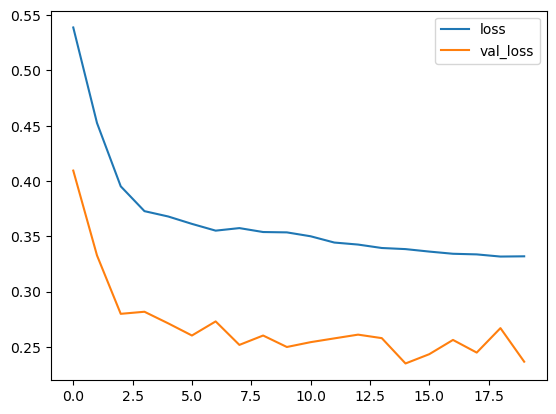

In [13]:
model.compile(
    #from_logits=False,
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
    verbose=1,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

### Test Data

In [14]:
test_df = pd.read_csv('train_data.csv')
test_df.drop(['game_mode'], axis=1)
test_df.head()
X_test= test_df.drop(['game_mode', 'radiant_win','match_id'], axis=1)
y_test = test_df['radiant_win']

In [46]:
X_test.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,45,80,88,8,98,45,80,88,8,98
1,56,1,23,47,97,56,1,23,47,97
2,68,63,16,48,21,68,63,16,48,21
3,74,105,71,16,73,74,105,71,16,73
4,94,85,83,86,128,94,85,83,86,128


In [16]:
y = test_df['radiant_win']
y = [int(b) for b in y]
y = pd.DataFrame(y, columns=['radiant_win'])
y.head()

,radiant_win
0,0
1,1
2,1
3,1
4,0


In [17]:
predicts = model.predict(X_test)

10051/10051 [==============================] - 24s 2ms/step


In [19]:
y_test_l = [int(b) for b in y_test]

results = []
for i in range(len(predicts)):
    if y_test_l[i] == round(predicts[i][0]):
        results.append(1)

print(len(results))
print(len(y_test))
print("ACC:", len(results)/len(y_test))
print(predicts[0:500])



293396
321618
ACC: 0.9122499362597865
[[0.7916955 ]
 [0.94885   ]
 [0.76648456]
 [0.7993647 ]
 [0.89872247]
 [0.8651244 ]
 [0.86152184]
 [0.7784988 ]
 [0.8732514 ]
 [0.02775856]
 [0.83630073]
 [0.8160325 ]
 [0.7216099 ]
 [0.74980503]
 [0.56628865]
 [0.8510548 ]
 [0.93829226]
 [0.9491568 ]
 [0.66739255]
 [0.87143433]
 [0.8185254 ]
 [0.38889736]
 [0.2894553 ]
 [0.64180416]
 [0.3275037 ]
 [0.88898516]
 [0.72335076]
 [0.9068968 ]
 [0.9653597 ]
 [0.14508626]
 [0.8289569 ]
 [0.26474327]
 [0.9391022 ]
 [0.69907457]
 [0.82918316]
 [0.86131096]
 [0.811075  ]
 [0.8707974 ]
 [0.85596704]
 [0.07419819]
 [0.9119692 ]
 [0.9701773 ]
 [0.8636677 ]
 [0.8409499 ]
 [0.85011274]
 [0.9516191 ]
 [0.44057277]
 [0.8988726 ]
 [0.84131324]
 [0.9291985 ]
 [0.9368577 ]
 [0.10677801]
 [0.8160325 ]
 [0.8452515 ]
 [0.8434414 ]
 [0.816883  ]
 [0.8375159 ]
 [0.921408  ]
 [0.5504423 ]
 [0.84965837]
 [0.72035486]
 [0.8862338 ]
 [0.528176  ]
 [0.88957834]
 [0.9465592 ]
 [0.12084287]
 [0.7778412 ]
 [0.3221354 ]
 [0.883655

In [138]:
from utils import getHeroId, getHeroName, getMatchHeroes

In [109]:
some_match = [getHeroId("rubick"), getHeroId("juggernaut"), getHeroId("legion_commander"), getHeroId("magnataur"), getHeroId("tidehunter"),
              getHeroId("techies"), getHeroId("bristleback"), getHeroId("slark"), getHeroId("crystal_maiden"), getHeroId("nevermore")]
some_match

[86.0, 8.0, 104.0, 97.0, 29.0, 105.0, 99.0, 93.0, 5.0, 11.0]

In [110]:
X_test_copy = X_test.columns
some_df = pd.DataFrame(columns=X_test_copy)
some_df = some_df.append(pd.DataFrame([some_match], columns=X_test_copy), ignore_index=True)
some_df

C:\Users\jirip\AppData\Local\Temp\ipykernel_5944\209270879.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  some_df = some_df.append(pd.DataFrame([some_match], columns=X_test_copy), ignore_index=True)


,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,86.0,8.0,104.0,97.0,29.0,105.0,99.0,93.0,5.0,11.0


In [111]:
some_pred = model.predict(some_df)

1/1 [==============================] - 0s 60ms/step


In [155]:
some_match = getMatchHeroes(7208797312)
some_match

[86.0, 8.0, 104.0, 97.0, 29.0, 105.0, 99.0, 93.0, 5.0, 11.0]

In [151]:
some_pred = model.predict(utils.getDataReadyForPrediction(some_match))

1/1 [==============================] - 0s 61ms/step


c:\Jiri\Code\Python_ml_2\ML_DOTA2_MATCH_WIN\utils.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [152]:
some_pred

array([[0.900463]], dtype=float32)